In [17]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [21]:
tau = 0.01
h   = 0.01
testsData = np.linspace(10, 2000, 200)

In [22]:
# store tests results of naive run

naive     = np.zeros(testsData.size)
parallel4 = np.zeros(testsData.size)

for i in range(testsData.size):
    K = M = testsData[i]
    
    # execute naive algo
    out = !./naive.out {K} {M} {tau} {h}
    regexMatch = re.search("\d+\.\d+(e-\d+)*", out[0])
    naive[i] = regexMatch[0]
    
    # execute parallel algo
    out = !mpirun -N 4 ./parallel.out {K} {M} {tau} {h}
    regexMatch = re.search("\d+\.\d+(e-\d+)*", out[0])
    parallel4[i] = regexMatch[0]

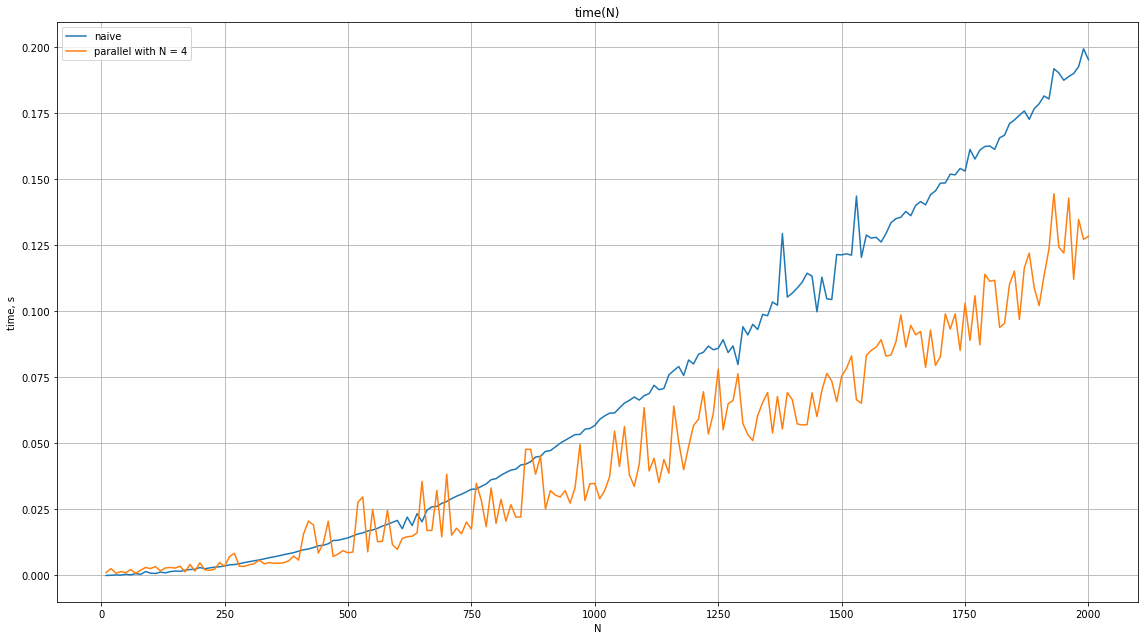

In [23]:
plt.figure(figsize = [16, 9])
plt.plot(testsData, naive, label="naive")
plt.plot(testsData, parallel4, label="parallel with N = 4")
plt.title(label = 'time(N)')
plt.xlabel("N")
plt.ylabel("time, s")
plt.tight_layout() 
plt.legend()
plt.grid()
plt.show()